<a href="https://colab.research.google.com/github/SilviaNurMahmudah/Machine-Learning/blob/main/Week13-Kuis2/Silvia_Nur_Mahmudah_2241727031_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : SILVIA NUR MAHMUDAH**

**NIM : 224177031**

**KELAS : TI-4J**

### Tentang data:

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatan tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label #N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

### Ketentuan:

1.   Pengerjaan secara individu alias setiap mahasiswa!
2.   Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3.   Tidak boleh ada duplikasi pekerjaan antar mahasiswa (evaluasi pemahaman pengerjaan quiz 2 dilaksanakan pada Minggu ke-14)


### Soal:

1.   Buat 5 jenis visualisasi yang dapat dihasilkan dari data yang diberikan! (**5 poin**)
2.   Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (**5 poin**)
3.   Tentukan data validasi! (**5 poin**)
4.   Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (**20 poin**)
5.   Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (**20 poin**)
6.   Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7.   Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (**20 poin**)
8.   Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (**10 poin**)

### Pengumpulan:

1.   Cantumkan link Repo atau Google Collab (jangan lupa set Public)
2.   Tidak perlu ada video presentasi

### Persiapan

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Week13-Kuis2/dataset_quiz.csv')
data

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


#### Data Cleaning

In [ ]:
## cek missing value
data.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [ ]:
# mengisi missing value dengan modus dari masing" data tersebut
from scipy.stats import mode

data['id_ketua'] = data['id_ketua'].fillna(data['id_ketua'].mode()[0])
data['id_anggota1'] = data['id_anggota1'].fillna(data['id_anggota1'].mode()[0])
data['id_anggota2'] = data['id_anggota2'].fillna(data['id_anggota2'].mode()[0])
data['id_anggota3'] = data['id_anggota3'].fillna(data['id_anggota3'].mode()[0])
data['id_anggota4'] = data['id_anggota4'].fillna(data['id_anggota4'].mode()[0])
data['id_anggota5'] = data['id_anggota5'].fillna(data['id_anggota5'].mode()[0])

In [ ]:
data

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,8812.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,8812.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,8812.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,8812.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,8812.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,8812.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,8812.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,8602.0,8901.0,8812.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,8812.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Soal 1

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

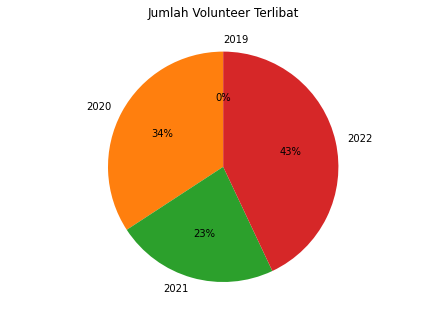

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

tahun2019 = data[data['tahun'] == 2019].sum().jml_vltr_terlibat
tahun2020 = data[data['tahun'] == 2020].sum().jml_vltr_terlibat
tahun2021 = data[data['tahun'] == 2021].sum().jml_vltr_terlibat
tahun2022 = data[data['tahun'] == 2022].sum().jml_vltr_terlibat

tahun = [tahun2019, tahun2020, tahun2021, tahun2022]
label = ['2019', '2020', '2021', '2022']
ax.pie(tahun, labels=label, autopct='%1.f%%', startangle=90)
plt.title('Jumlah Volunteer Terlibat')
plt.show()

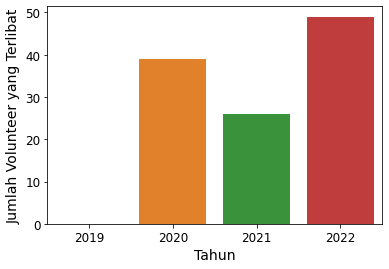

In [ ]:
sns.barplot(x='tahun', y='jml_vltr_terlibat', data=data.groupby(data['tahun']).sum().jml_vltr_terlibat.reset_index())
plt.xlabel('Tahun', size=14)
plt.ylabel('Jumlah Volunteer yang Terlibat', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

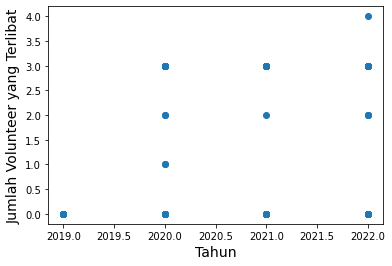

In [ ]:
# sns.pairplot(data=data.groupby(data['tahun']).sum().jml_vltr_terlibat.reset_index(), x_vars=['tahun'], y_vars='jml_vltr_terlibat', aspect=1, kind='scatter')
plt.scatter(data['tahun'], data['jml_vltr_terlibat'])
plt.xlabel('Tahun', size=14)
plt.ylabel('Jumlah Volunteer yang Terlibat', size=14)
plt.show()

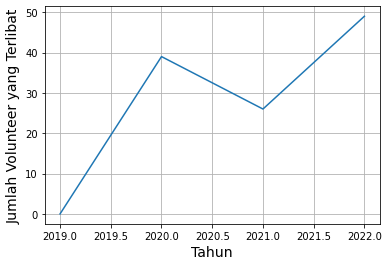

In [ ]:
sns.lineplot(x='tahun', y='jml_vltr_terlibat', data=data.groupby(data['tahun']).sum().jml_vltr_terlibat.reset_index())
plt.xlabel('Tahun', size=14)
plt.ylabel('Jumlah Volunteer yang Terlibat', size=14)
plt.grid(True)

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


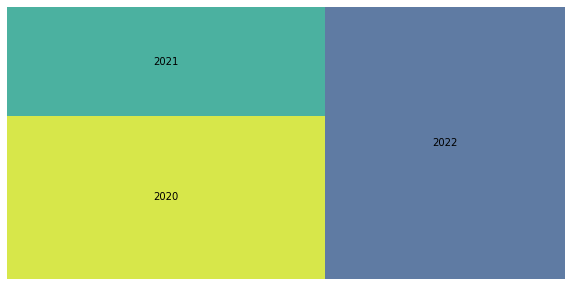

In [ ]:
import squarify

plt.figure(figsize=(10,5))

tahun2019 = data[data['tahun'] == 2019].sum().jml_vltr_terlibat
tahun2020 = data[data['tahun'] == 2020].sum().jml_vltr_terlibat
tahun2021 = data[data['tahun'] == 2021].sum().jml_vltr_terlibat
tahun2022 = data[data['tahun'] == 2022].sum().jml_vltr_terlibat

tahun = [tahun2020, tahun2021, tahun2022]
label = ['2020', '2021', '2022']
squarify.plot(sizes = tahun,
              label = label,              
              alpha=.8)
plt.axis('off')
plt.show()

### Soal 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encode.fit_transform(data[col])

X = data.drop(['tahun'], axis=1).values
y = data['jml_vltr_terlibat'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Soal 3

In [ ]:
X = data.iloc[:, 1:]
y = data['jml_vltr_terlibat']
X

,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7214.0,6211.0,8602.0,7801.0,8812.0,0,0,2019,1,1,1,2,0,3,1
1,7109.0,8402.0,7903.0,9202.0,8812.0,0,0,2019,1,1,1,2,0,3,1
2,8201.0,8701.0,9101.0,9003.0,8812.0,0,0,2019,1,1,1,2,0,3,1
3,7702.0,8602.0,8903.0,8903.0,8812.0,0,0,2019,1,1,1,2,0,3,1
4,8305.0,5911.0,5903.0,8402.0,8812.0,0,0,2019,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8804.0,9102.0,8005.0,9303.0,8812.0,1,3,2022,1,1,1,2,0,3,1
81,8901.0,9003.0,9303.0,9007.0,8812.0,1,3,2022,1,1,1,2,0,3,1
82,8903.0,8703.0,8602.0,8901.0,8812.0,1,3,2022,1,1,1,2,0,3,1
83,8601.0,9202.0,9102.0,6204.0,8812.0,1,3,2022,1,1,1,2,0,3,1


### Soal 4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Traning Decision Tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.94
Test set accuracy: 0.9411764705882353


In [ ]:
#Training RandomForest
rf = RandomForestClassifier(n_estimators=10, random_state=1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.82
Test set accuracy: 0.8235294117647058


### Soal 5

In [ ]:
x1 = data.drop(columns=['tahun'], axis=1).values
y1 = data['luaran_hki'].values

# split data test training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [ ]:
dt1 = DecisionTreeClassifier()

dt1.fit(x1_train, y1_train)

y_pred_dt1 = dt1.predict(x1_test)

acc_dt1 = accuracy_score(y1_test, y_pred_dt1)
print("Test set accuracy: {:.2f}".format(acc_dt1))
print(f"Test set accuracy: {acc_dt1}")

Test set accuracy: 1.00
Test set accuracy: 1.0


### Soal 6

In [ ]:
from sklearn import metrics
import itertools
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [ ]:
#Confusion Matrix
conf = metrics.confusion_matrix(y_test, y_pred_dt)
conf

array([[8, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 6]])

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = get_confusion_matrix(y_test, y_pred_dt)
conf

array([[8, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 6]])

Text(0.5, 15.0, 'Predicted label')

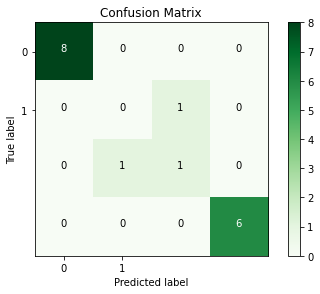

In [ ]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# ROC Curve
x2 = data.drop("tahun",axis=1)
y2 = data[["jml_vltr_terlibat"]]

from sklearn import preprocessing
x2 = preprocessing.normalize(x2)
y2 = preprocessing.normalize(y2)

from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


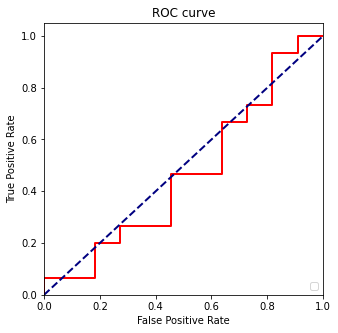

In [ ]:
from sklearn.linear_model import SGDClassifier 

model = SGDClassifier(loss='hinge', class_weight='balanced')
model.fit(x2_train, y2_train)

y_test_pred = model.decision_function(x2_test) 

test_fpr, test_tpr, te_thresholds = roc_curve(y2_test, y_test_pred)

get_auc = auc(test_fpr, test_tpr)

plt.figure(figsize=(5,5))
plt.plot(test_fpr, test_tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Soal 7

In [ ]:
#Grid Search
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=4 , n_repeats=3 , random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(dt, param_grid=params, cv=cv)

%timeit grid.fit(X, y)

score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

643 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 7}


In [ ]:
#Random Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

DT = DecisionTreeClassifier()

params = {
    'criterion':['gini', 'entropy'],
    'max_depth':list(range(5,11))
}

randomSCV = RandomizedSearchCV(DT,param_distributions=params,cv=cv)

%timeit randomSCV.fit(X,y)

score = randomSCV.score(X,y)

print(f'Hasil Evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {randomSCV.best_params_}')

540 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil Evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 5, 'criterion': 'gini'}


In [ ]:
#Exhausive Search
from sklearn.svm import SVC

model_svc_manual = SVC(C=100, kernel='poly', degree=3)

%timeit model_svc_manual.fit(X, y)

score = model_svc_manual.score(X,y)

print(f'Hasil evaluasi: {score}')

10.4 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Hasil evaluasi: 0.5647058823529412


### Soal 8

Accuracy score Random Forest (Soal 4): 0.8235294117647058
Accuracy score Decision Tree (Soal 4): 0.9411764705882353
Accuracy score Decision Tree (Soal 5): 1.0


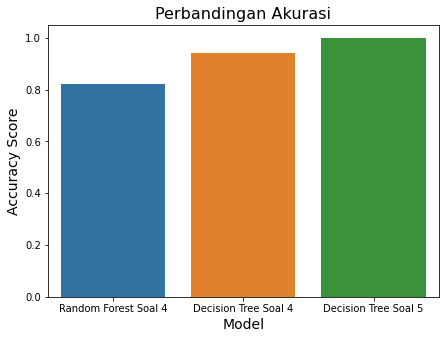

In [ ]:
print(f'Accuracy score Random Forest (Soal 4): {acc_rf}')
print(f'Accuracy score Decision Tree (Soal 4): {acc_dt}')
print(f'Accuracy score Decision Tree (Soal 5): {acc_dt1}')

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Random Forest Soal 4', 'Decision Tree Soal 4', 'Decision Tree Soal 5'], y=[acc_rf, acc_dt, acc_dt1], ax=ax)
plt.title('Perbandingan Akurasi', size=16)
plt.xlabel('Model', size=14)
plt.ylabel('Accuracy Score', size=14)
plt.show()